In [79]:
#from sklearn.neighbors import KDTree
from scipy import spatial as sp


import clustertools as ctools
import numpy as np
import matplotlib.pyplot as plt

In [29]:
cluster=ctools.load_cluster(ctype='limepy',gcname='NGC6101',mbar=0.2,units='pckms',origin='cluster')

LOAD_CLUSTER MADE USE OF:
Gieles, M. & Zocchi, A. 2015, MNRAS, 454, 576
Vasiliev E., 2019, MNRAS, 484,2832 
de Boer, T. J. L., Gieles, M., Balbinot, E., Hénault-Brunet, V., Sollima, A., Watkins, L. L., Claydon, I. 2019, MNRAS, 485, 4906


In [30]:
cluster.ntot

9681

In [31]:
cluster.m

array([ 0.20001363,  0.20001363,  0.20001363, ...,  0.20001363,
        0.20001363,  0.20001363])

In [83]:
pos=np.column_stack([cluster.x,cluster.y,cluster.z])
vel=np.column_stack([cluster.vx,cluster.vy,cluster.vz])

#tree=KDTree(pos)
tree=sp.cKDTree(pos)

In [84]:
amin=np.argmin(cluster.r)

In [87]:
nb_r_list6, nb_index_list6 = tree.query(pos, 7)

In [104]:
nb_r_list6

array([[  0.        ,   7.64057551,   8.54963315, ...,   9.94314467,
         10.25225123,  11.38893458],
       [  0.        ,   1.09907084,   1.87062306, ...,   2.30739801,
          2.32750572,   2.40660324],
       [  0.        ,   2.2233583 ,   3.55335161, ...,   4.86747623,
          4.97030096,   5.10367651],
       ..., 
       [  0.        ,   1.37772082,   1.48581835, ...,   1.58812228,
          1.69213645,   1.69807222],
       [  0.        ,   1.30501865,   1.49333249, ...,   2.20234327,
          2.21806778,   2.51805845],
       [  0.        ,   5.00345842,   6.41760365, ...,   8.54805841,
          8.59354348,  10.15197347]])

In [105]:
nb_r_list6[:,-1]

array([ 11.38893458,   2.40660324,   5.10367651, ...,   1.69807222,
         2.51805845,  10.15197347])

In [88]:
nb_index_list6[0]

array([   0, 8759, 1746, 8880, 5076, 7638, 6008])

In [96]:
nb_index_list6

array([[   0, 8759, 1746, ..., 5076, 7638, 6008],
       [   1, 9435, 4279, ..., 5773, 9213, 7133],
       [   2, 3393,  296, ..., 3142, 9196, 7234],
       ..., 
       [9678, 9150,  577, ..., 7036, 2748, 4681],
       [9679, 4033, 6579, ..., 8085, 9061, 7079],
       [9680,  572, 9283, ..., 5408, 2377, 5976]])

In [103]:
nb_index_list6[:,-1]

array([6008, 7133, 7234, ..., 4681, 7079, 5976])

In [93]:
cluster.m[nb_index_list6[:-1]]

array([[ 0.20001363,  0.20001363,  0.20001363, ...,  0.20001363,
         0.20001363,  0.20001363],
       [ 0.20001363,  0.20001363,  0.20001363, ...,  0.20001363,
         0.20001363,  0.20001363],
       [ 0.20001363,  0.20001363,  0.20001363, ...,  0.20001363,
         0.20001363,  0.20001363],
       ..., 
       [ 0.20001363,  0.20001363,  0.20001363, ...,  0.20001363,
         0.20001363,  0.20001363],
       [ 0.20001363,  0.20001363,  0.20001363, ...,  0.20001363,
         0.20001363,  0.20001363],
       [ 0.20001363,  0.20001363,  0.20001363, ...,  0.20001363,
         0.20001363,  0.20001363]])

In [62]:
nb_mass_tot6=np.sum(cluster.m[nb_index_list6],axis=1) + cluster.m
nb_inv_r6 = 1/nb_r_list6[:,5]
rho = nb_mass_tot6*(nb_inv_r6*nb_inv_r6*nb_inv_r6)
rho_tot = rho.sum()

cm_pos = np.array([np.sum(rho*pos[:,i])/rho_tot for i in range(3)])
cm_vel = np.array([np.sum(rho*vel[:,i])/rho_tot for i in range(3)])

In [89]:
rho.sum()

10466.166772867224

In [90]:
np.sum(rho)

10466.166772867224

In [64]:
cm_pos,cm_vel

(array([ 0.03462265, -0.04598183,  0.04777895]),
 array([ 0.00260841, -0.00257559, -0.0096254 ]))

In [65]:
cluster.find_centre()

(0.17758658133263633,
 -0.086653319526648523,
 0.31921413848456753,
 -0.036730880502808053,
 -0.0017829016100591524,
 -0.029559483847890214)

(-1.0, 1.0)

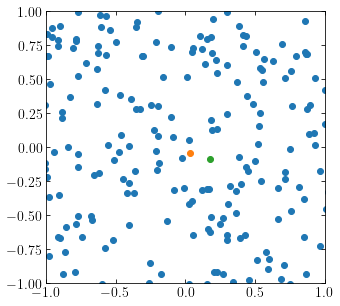

In [75]:
plt.scatter(cluster.x,cluster.y)
plt.scatter(cm_pos[0],cm_pos[1])
plt.scatter(cluster.xc,cluster.yc)
plt.xlim(-1,1)
plt.ylim(-1,1)

In [66]:
len(rho)

9681

In [67]:
rho2 = rho*rho
r2=(cluster.r**2.)
rc = np.sqrt((r2*rho2).sum()/(rho2.sum()))
print(rc)

3.52635068336


0

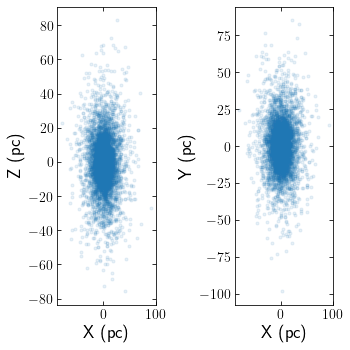

In [43]:
ctools.starplot(cluster)

In [38]:
cluster.r[0]

45.372042682859657